In [1]:
import numpy as np
import matplotlib.pyplot as plt
from layer import DenseLayer, ActivationLayer, FlattenLayer, SoftmaxLayer
from activation import relu
from loss import cross_entropy
from utils import load_mnist, train_one_epoch, evaluate

In [2]:
x_train, y_train, x_test, y_test = load_mnist()

x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:1000]
y_test = y_test[:1000]


In [3]:
network = [
    FlattenLayer((28, 28)),
    DenseLayer(28*28, 100),
    ActivationLayer(relu),
    DenseLayer(100, 100),
    ActivationLayer(relu),
    DenseLayer(100, 10),
    SoftmaxLayer(10)
]

loss_ep = []
tr_acc_ep = []
te_acc_ep = []
epochs = 20
lr = 0.001
print(f'Sanity Check: test_acc={evaluate(network, x_test, y_test)}')
for epoch in range(epochs):
    network, loss = train_one_epoch(network, x_train, y_train, cross_entropy, lr)
    tr_acc = evaluate(network, x_train, y_train)
    te_acc = evaluate(network, x_test, y_test)
    loss_ep.append(loss)
    tr_acc_ep.append(tr_acc)
    te_acc_ep.append(te_acc)
    print(f'[{epoch + 1}/{epochs}] loss={loss:.6f}, train_acc={tr_acc:.6f}, test_acc={te_acc:.6f}')


Sanity Check: test_acc=0.071
[1/20] loss=0.225672, train_acc=0.397000, test_acc=0.326000
[2/20] loss=0.210883, train_acc=0.618000, test_acc=0.531000
[3/20] loss=0.187087, train_acc=0.649000, test_acc=0.564000
[4/20] loss=0.151723, train_acc=0.719000, test_acc=0.634000
[5/20] loss=0.115453, train_acc=0.774000, test_acc=0.696000
[6/20] loss=0.089545, train_acc=0.817000, test_acc=0.724000
[7/20] loss=0.072890, train_acc=0.842000, test_acc=0.751000
[8/20] loss=0.061800, train_acc=0.856000, test_acc=0.762000
[9/20] loss=0.053934, train_acc=0.875000, test_acc=0.775000
[10/20] loss=0.048112, train_acc=0.883000, test_acc=0.783000
[11/20] loss=0.043653, train_acc=0.895000, test_acc=0.790000
[12/20] loss=0.040097, train_acc=0.902000, test_acc=0.799000
[13/20] loss=0.037130, train_acc=0.910000, test_acc=0.803000
[14/20] loss=0.034615, train_acc=0.916000, test_acc=0.807000
[15/20] loss=0.032426, train_acc=0.917000, test_acc=0.814000
[16/20] loss=0.030488, train_acc=0.921000, test_acc=0.812000
[17/

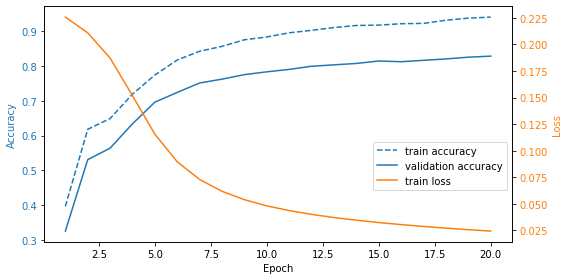

In [4]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(range(1,epochs+1),tr_acc_ep, '--',c='tab:blue',label='train accuracy')
ax1.plot(range(1,epochs+1),te_acc_ep, '-',c='tab:blue',label='validation accuracy')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Epoch')
ax2 = ax1.twinx()
ax2.plot(range(1,epochs+1),loss_ep,'-',c='tab:orange', label='train loss')
ax2.set_ylabel('Loss',color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', bbox_to_anchor=(1,0.2))
fig.tight_layout()
plt.show()